<a href="https://colab.research.google.com/github/peeyushsinghal/GAN/blob/master/DCGAN_MNIST_digits_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading dataset
from keras.datasets.mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


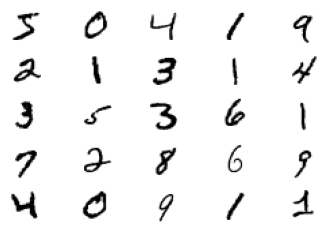

In [2]:
# checking the data example
# plot raw pixel data
import matplotlib.pyplot as plt
import random

for i in range(25):
  # define subplot
  plt.subplot(5, 5,i+1)
  # turn off axis
  plt.axis('off')
  # plot raw pixel data
  plt.imshow(trainX[i], cmap='gray_r')
plt.show()


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, LeakyReLU, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [4]:
# defining the discriminator function
def define_discriminator(in_shape = (28,28,1)):
  model = Sequential()
  # 1st block
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same', input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  # 2nd block
  model.add(Conv2D(64,(3,3),strides=(2,2),padding='same', input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  # Flattening the output of Conv blocks
  model.add(Flatten())
  # Flat output feeding into dense layer
  model.add(Dense(1,activation='sigmoid'))
  # compling model
  opt = Adam (learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

In [5]:
a = define_discriminator()
a.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

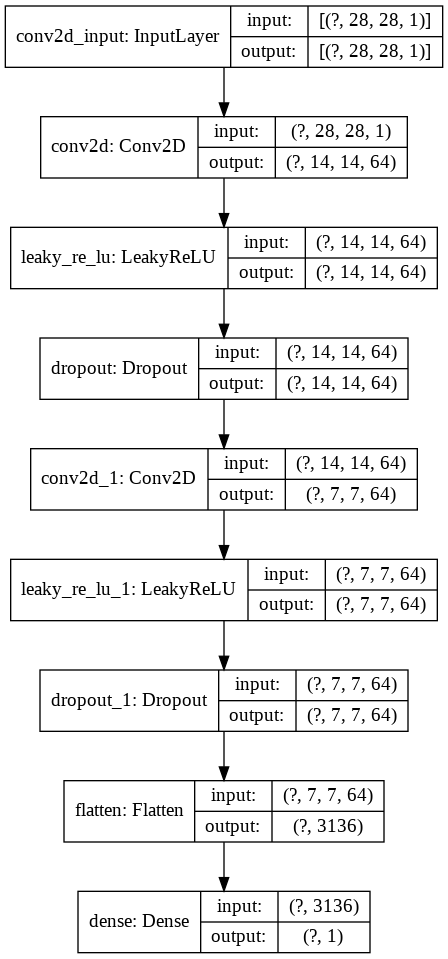

In [6]:
#plot the model
from keras.utils.vis_utils import plot_model
plot_model(a, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
import numpy as np
#import nump.random


In [8]:
# creating the input data (real) for discriminator input

#### PART 1 - normalizing the input data
# The images are 2D arrays of pixels and convolutional neural networks expect 3D arrays of images as input, where each image has one or more channels

# expand to 3d, e.g. add channels dimension, -1 adds the channel dimension to the last

# load and prepare mnist training images
def load_real_samples():
  # load mnist dataset
  (trainX, _), (_, _) = load_data()
  # expand to 3d, e.g. add channels dimension
  X = np.expand_dims(trainX, axis=-1)
  # convert from unsigned ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [0,1] # discriminator output function is sigmoid, hence the use of [0,1] , if it is tanh we could have done [-1,1]
  # best practice is to use [-1,1]
  X = X / 255.0
  return X

In [9]:
#### PART 2 - generating real samples, with label = 1
# select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = np.random.randint(0,dataset.shape[0],n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate 'real' class labels (1)
  y = np.ones((n_samples, 1))
  return X, y

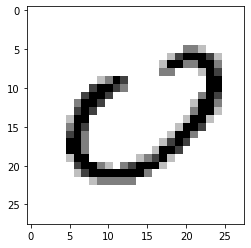

In [10]:
# checking real samples generated
t=generate_real_samples(load_real_samples(),1)
for i in range(len(t[0])):
  plt.imshow(t[0][i].reshape(t[0].shape[1],t[0].shape[2]), cmap='gray_r')
  plt.show()

In [11]:
# creating the input data (fake) for discriminator input

def generate_fake_samples(n_samples):
  # choose random instances
  # generate uniform random numbers in [0,1]
  X = np.random.rand(n_samples, 28, 28, 1)
  #(28 * 28 * n_samples)
  # reshape into a batch of grayscale images
  #X = X.reshape((n_samples, 28, 28, 1))
  # generate 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

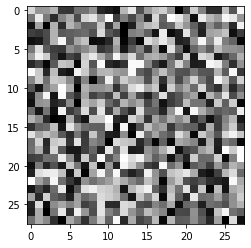

In [12]:
# checking fake samples generated
t=generate_fake_samples(1)
for i in range(len(t[0])):
  plt.imshow(t[0][i].reshape(t[0].shape[1],t[0].shape[2]), cmap='gray_r')
  plt.show()

In [13]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate 'fake' examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [14]:
# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)

>1 real=45% fake=45%
>2 real=59% fake=53%
>3 real=59% fake=77%
>4 real=49% fake=83%
>5 real=57% fake=94%
>6 real=54% fake=95%
>7 real=63% fake=99%
>8 real=59% fake=100%
>9 real=62% fake=100%
>10 real=66% fake=100%
>11 real=70% fake=100%
>12 real=78% fake=100%
>13 real=75% fake=100%
>14 real=67% fake=100%
>15 real=84% fake=100%
>16 real=76% fake=100%
>17 real=77% fake=100%
>18 real=82% fake=100%
>19 real=82% fake=100%
>20 real=85% fake=100%
>21 real=91% fake=100%
>22 real=91% fake=100%
>23 real=92% fake=100%
>24 real=94% fake=100%
>25 real=94% fake=100%
>26 real=97% fake=100%
>27 real=96% fake=100%
>28 real=98% fake=100%
>29 real=99% fake=100%
>30 real=98% fake=100%
>31 real=98% fake=100%
>32 real=98% fake=100%
>33 real=97% fake=100%
>34 real=100% fake=100%
>35 real=99% fake=100%
>36 real=99% fake=100%
>37 real=100% fake=100%
>38 real=100% fake=100%
>39 real=99% fake=100%
>40 real=100% fake=100%
>41 real=100% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=1

In [15]:
from keras.layers import Conv2DTranspose, Reshape


In [16]:
# defining generator model
def define_generator(output_dim=28,n_dims=100):
  model = Sequential()
  model.add(Dense(128*7*7,input_dim=n_dims))
  model.add(Reshape((7, 7, 128)))
  # upsample to 14x14
  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # reshaping for one channel
  model.add(Conv2D(1,(7,7),activation='sigmoid',padding='same'))
  return model


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 128)       262272    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)        

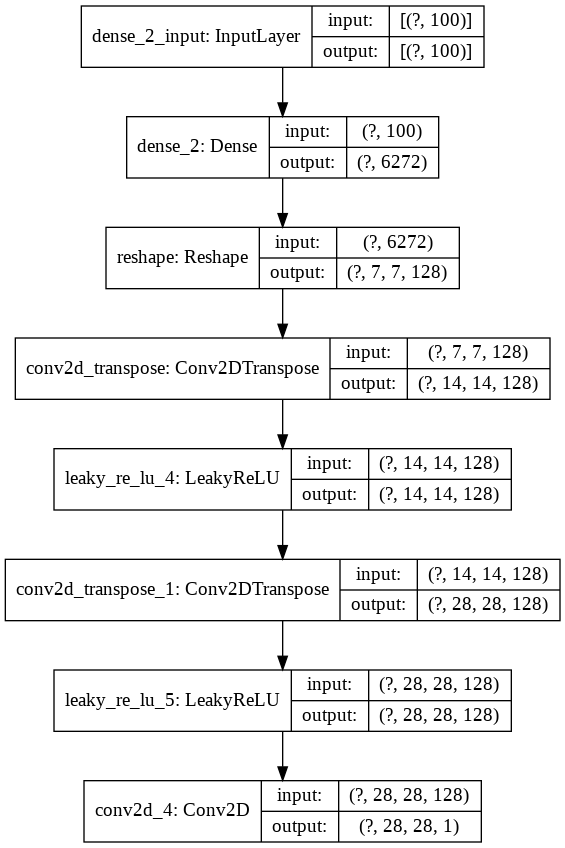

In [17]:
# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = np.random.rand(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [19]:
latent = generate_latent_points(100, 2)
print((latent.shape[0]))

2


In [22]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  #creating latent points
  latent_points = generate_latent_points(latent_dim,n_samples)
  #creating images for latent points
  # predict outputs
  X = g_model.predict(latent_points)
  # create 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

In [23]:
# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)

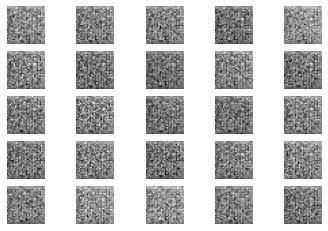

In [25]:
# plot the generated samples
for i in range(n_samples):
  # define subplot
  plt.subplot(5, 5, 1 + i)
  # turn off axis labels
  plt.axis('off')
  # plot single image
  plt.imshow(X[i, :, :, 0], cmap='gray_r')
  # show the figure
plt.show()

In [30]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile model
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_12 (Sequential)   (None, 28, 28, 1)         1164289   
_________________________________________________________________
sequential_11 (Sequential)   (None, 1)                 40705     
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


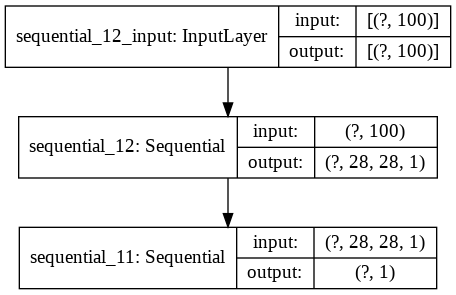

In [31]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
gan_model.summary()
# plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
  # manually enumerate epochs
  for i in range(n_epochs):
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    # update the generator via the discriminator's error
    gan_model.train_on_batch(x_gan, y_gan)

In [44]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # create training set for the discriminator
      X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
      # update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    # evaluate the model performance, sometimes
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [37]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
  # plot images
  for i in range(n * n):
    # define subplot
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    plt.savefig(filename)
    plt.close()

In [38]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  # prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  # evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  # evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  # save plot
  save_plot(x_fake, epoch)
  # save the generator model tile file
  filename = 'generator_model_%03d.h5' % (epoch + 1)
  g_model.save(filename)

In [46]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Streaming output truncated to the last 5000 lines.
>29, 153/234, d=0.000, g=8.042
>29, 154/234, d=0.016, g=8.102
>29, 155/234, d=0.000, g=8.008
>29, 156/234, d=0.001, g=8.069
>29, 157/234, d=0.000, g=8.088
>29, 158/234, d=0.000, g=8.078
>29, 159/234, d=0.001, g=8.073
>29, 160/234, d=0.000, g=8.086
>29, 161/234, d=0.000, g=8.123
>29, 162/234, d=0.000, g=8.038
>29, 163/234, d=0.000, g=8.038
>29, 164/234, d=0.000, g=8.036
>29, 165/234, d=0.000, g=8.153
>29, 166/234, d=0.000, g=8.068
>29, 167/234, d=0.000, g=8.037
>29, 168/234, d=0.000, g=8.156
>29, 169/234, d=0.000, g=8.119
>29, 170/234, d=0.000, g=8.116
>29, 171/234, d=0.000, g=8.015
>29, 172/234, d=0.000, g=8.135
>29, 173/234, d=0.000, g=8.169
>29, 174/234, d=0.002, g=8.099
>29, 175/234, d=0.000, g=8.072
>29, 176/234, d=0.000, g=8.041
>29, 177/234, d=0.003, g=8.052
>29, 178/234, d=0.000, g=8.056
>29, 179/234, d=0.000, g=8.023
>29, 180/234, d=0.000, g=8.200
>29, 181/234, d=0.000, g=8.071
>29, 182/234, d=0.001, g=8.091
>29, 183/234, d=0.0